In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X,Y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

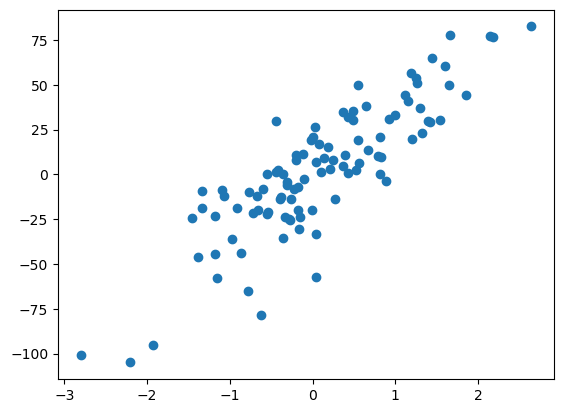

In [3]:
plt.scatter(X,Y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train,Y_train)

LinearRegression()

In [8]:
print(lr.coef_)
print(lr.intercept_)

[33.17192149]
-0.08078842753380266


In [10]:
Y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.5677093252185942

In [11]:
class GDregressor:
    
    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,Y):
        # calculate the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(Y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((Y - self.m*X.ravel() - self.b)*X.ravel())
            self.b = self.b -(self.lr * loss_slope_b)
            self.m = self.m -(self.lr * loss_slope_m)
            
        print(self.m, self.b)
        
    def predict(self, X):
        return self.m *X + self.b

In [12]:
gd = GDregressor(0.001, 100)

In [13]:
gd.fit(X_train,Y_train)

33.171925012617216 -0.08079232672373275


In [14]:
gd.predict(X)

array([[  1.12997612],
       [  8.20870753],
       [ 17.33725772],
       [ -0.80324763],
       [-25.80026743],
       [  1.19759041],
       [ 72.18515413],
       [ 27.06866144],
       [ 18.19830233],
       [  5.97055067],
       [  7.01096238],
       [-10.52296938],
       [-12.93568213],
       [ 41.75132345],
       [ 87.69177213],
       [ -5.93407085],
       [-11.16248865],
       [ 61.50493968],
       [ -5.71790844],
       [-14.84855369],
       [ 12.90405869],
       [  9.06077376],
       [-18.22321963],
       [ 16.17631906],
       [-44.22525116],
       [ 47.78319473],
       [ 54.68832279],
       [ -8.58325024],
       [ 30.60126643],
       [ -9.54226215],
       [ -4.07062758],
       [  0.78066824],
       [ 52.92289196],
       [-39.16509383],
       [-48.29589466],
       [ -8.9321312 ],
       [-93.12237586],
       [-38.31647122],
       [ 12.03870683],
       [ 41.20542047],
       [-22.44680343],
       [ 39.33071994],
       [ 70.89719805],
       [-11

In [16]:
Y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.5677093253527665